In [1]:
import chemfit
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Minimal demo

Load a model spectrum with given stellar parameters and radial velocity, simulate an observation with the *blue* and *medium resolution red* arms of **PFS**, fit a model to the simulated spectrum using gradient descent.

In [2]:
# We configure chemfit to use Grid7 models and set the spectrograph configuration to PFS
chemfit.initialize('Grid7', 'PFS')

# Specify path to Grid7 models (the directory containing "grid7" and "gridie")
# Alternatively, this definition may be moved to settings/local/Grid7.py (untracked)
chemfit.settings['griddir'] = '<path_to_Grid7>'

Generate a synthetic observation at given stellar parameters:

In [3]:
# Stellar parameters
params = {'teff': 4000, 'logg': 1.5, 'zscale': -1.05, 'alpha': 0.3, 'redshift': 150}

# Interpolate the model grid
interpolator = chemfit.ModelGridInterpolator(resample = False)
model_wl, model_flux = interpolator(params)

# Simulate observation with PFS in blue and red arms with medium resolution
wl, flux = chemfit.simulate_observation(model_wl, model_flux, detector_wl = ['blue', 'red_mr'], combine = False)

# Generate noise with SNR=15
SNR = 15
ivar = {}
for arm in flux:
    sigma = flux[arm] / SNR
    ivar[arm] = sigma ** -2.0
    flux[arm] = np.random.normal(flux[arm], sigma)

/home/roman/PFS/chemfit/chemfit.py:58: UserWarning: In spectrograph arm blue the model does not cover the full wavelength range of the detector. Affected bins were set to np.nan
  warnings.warn(message)


Run the model fit using gradient descent:

In [4]:
# Initial guesses
initial = {'teff': 5000, 'logg': 2.0, 'zscale': 0.0, 'alpha': 0.0, 'redshift': 0}

# Run the fitter
fit_grad = chemfit.chemfit(wl, flux, ivar, initial, method = 'gradient_descent')

print('Best-fit parameters:', fit_grad['fit'])
print('Errors:', fit_grad['errors'])

Best-fit parameters: {'teff': 4000.3475424363883, 'logg': 1.6522084310746878, 'zscale': -1.0418453473262794, 'alpha': 0.26790526502352663, 'redshift': 148.34996509234696}
Errors: {'zscale': 0.04525770753633112, 'alpha': 0.03663106330972583, 'teff': 27.786235090063382, 'logg': 0.0950695132719953, 'redshift': 0.8217832846135498}


Plot the observed spectrum and the best-fit model:

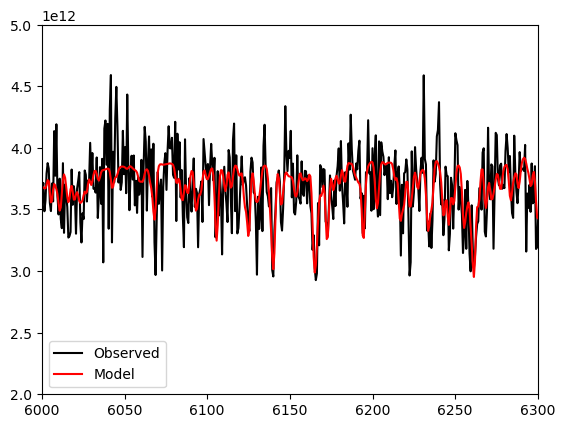

In [5]:
plt.plot(fit_grad['extra']['observed']['wl'], fit_grad['extra']['observed']['flux'], 'k-', label = 'Observed')
plt.plot(fit_grad['extra']['model']['wl'], fit_grad['extra']['model']['cont'] * fit_grad['extra']['model']['flux'], 'r-', label = 'Model')

plt.xlim(6000, 6300)
plt.ylim(2e12, 5e12)
plt.legend()